# La consommation électrique annuelle pour chaque ville 

In [171]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [172]:
base =pd.read_csv('./data/conso_electrique.csv', sep = ';')
base

/tmp/ipykernel_137820/398338239.py:1: DtypeWarning: Columns (3,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  base =pd.read_csv('./data/conso_electrique.csv', sep = ';')


,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
0,Enedis,Electricité,2014,80769,Treux,248000499,CC du Val de Somme,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Enedis,Electricité,2014,80770,Tully,200070944,CC du Vimeu,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Enedis,Electricité,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Enedis,Electricité,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enedis,Electricité,2014,80775,Valines,200070944,CC du Vimeu,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136816,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136817,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136818,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136819,Enedis,Electricité,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
base.describe()

,Année,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Nombre de mailles secretisées,Part thermosensible (%),Conso totale à usages thermosensibles (MWh),Conso totale à usages non thermosensibles (MWh),...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
count,136821.000000,136821.000000,34435.000000,123619.000000,1.236190e+05,1.368210e+05,136821.000000,125708.000000,5.992300e+04,59923.0,...,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000
mean,2017.884623,56.151103,49.872572,304.290230,5.061326e+03,8.349993e+02,0.095789,1.189162,3.113159e+04,0.0,...,26.011167,43.360932,19.352969,8.579784,15.329755,26.500773,15.718239,12.355292,2.134761,28.180406
std,3.798778,25.963165,27.570325,2848.838104,6.003756e+04,1.907457e+04,0.311789,17.971097,8.109516e+05,0.0,...,6.199030,15.377691,14.562775,6.581742,8.971365,9.474720,6.897035,6.494384,2.610690,12.665340
min,2013.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,32.000000,31.000000,1.000000,9.858550e+01,6.346054e+00,0.000000,0.000000,0.000000e+00,0.0,...,22.067585,32.800610,8.151010,4.494380,8.791210,20.565980,10.799770,7.586160,0.372090,18.845940
50%,2015.000000,53.000000,47.000000,4.000000,4.330000e+02,2.498300e+01,0.000000,0.000000,0.000000e+00,0.0,...,26.286980,44.124850,15.847420,7.173550,13.157890,26.341460,15.126050,11.352660,1.369860,27.397260
75%,2023.000000,84.000000,71.000000,80.000000,1.977631e+03,1.352910e+02,0.000000,0.000000,0.000000e+00,0.0,...,30.078835,54.054050,27.152610,10.745940,20.138505,32.000000,20.005790,16.105755,2.923980,36.102720
max,2023.000000,94.000000,99.000000,310261.000000,1.312829e+07,3.426639e+06,7.000000,638.803462,1.202843e+08,0.0,...,54.072750,100.000000,93.243240,78.571430,75.862070,77.669900,62.683810,100.000000,49.827590,82.466870


In [174]:
nouvelle_base = base.drop(columns=['OPERATEUR', 'FILIERE', 'Type EPCI', 'Code Département', 'Nombre de mailles secretisées',
                   'Part thermosensible (%)', 'Conso totale à usages thermosensibles (MWh)', 
                    "Conso totale corrigée de l'aléa climatique à usages thermosensibles (MWh)",
                    "Conso moyenne corrigée de l'aléa climatique à usages thermosensibles (MWh)",
                   'Conso totale à usages non thermosensibles (MWh)', 
                   'Conso moyenne à usages thermosensibles (MWh)', 
                   'Conso moyenne à usages non thermosensibles (MWh)', 
                   'Thermosensibilité moyenne (kWh DJU)', 'DJU à TR', 'DJU à TN', 
                   'Taux de logements collectifs', 'Taux de résidences principales', 
                   'Superficie des logements <30 m2', 'Superficie des logements 30 à 40 m2', 
                   'Superficie des logements 40 à 60 m2', 'Superficie des logements 60 à 80 m2', 
                   'Superficie des logements 80 à 100 m2', 'Superficie des logements >100 m2', 
                   'Résidences principales avant 1919', 'Résidences principales de 1919 à 1945', 
                   'Résidences principales de 1946 à 1970', 'Résidences principales de 1971 à 1990', 
                   'Résidences principales de 1991 à 2005', 'Résidences principales de 2006 à 2015', 
                   'Résidences principales après 2016', 'Taux de chauffage électrique'], 
          errors='ignore')




In [175]:
nouvelle_base

,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Nom Département,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Thermosensibilité totale (kWh DJU),Nombre d'habitants
0,2014,80769,Treux,248000499,CC du Val de Somme,Somme,32,Hauts-de-France,ENT,TERTIAIRE,NaN,1.0,106.470000,106.470000,0.0,NaN
1,2014,80770,Tully,200070944,CC du Vimeu,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,317.0,1693.450000,5.342114,0.0,NaN
2,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,Somme,32,Hauts-de-France,ENT,AGRICULTURE,NaN,1.0,3.430000,3.430000,0.0,NaN
3,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,180.0,1000.180000,5.556556,0.0,NaN
4,2014,80775,Valines,200070944,CC du Vimeu,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,307.0,1710.280000,5.570945,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136816,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,ENT,TERTIAIRE,85.0,1.0,27.982000,27.982000,NaN,NaN
136817,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,PRO,INCONNU,NaN,NaN,NaN,0.000000,NaN,NaN
136818,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,PRO,TERTIAIRE,NaN,47.0,354.177000,7.536000,NaN,NaN
136819,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,Aisne,32,Hauts-de-France,ENT,INDUSTRIE,21.0,1.0,85.748611,85.748611,NaN,NaN


In [176]:
nouvelle_base.columns

Index(['Année', 'Code Commune', 'Nom Commune', 'Code EPCI', 'Nom EPCI',
       'Nom Département', 'Code Région', 'Nom Région',
       'CODE CATEGORIE CONSOMMATION', 'CODE GRAND SECTEUR',
       'CODE SECTEUR NAF2', 'Nb sites', 'Conso totale (MWh)',
       'Conso moyenne (MWh)', 'Thermosensibilité totale (kWh DJU)',
       'Nombre d'habitants'],
      dtype='object')

In [177]:
donnéee = base.iloc[:,0:10]
donnéee

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département
0,Enedis,Electricité,2014,80769,Treux,248000499,CC du Val de Somme,NaN,80,Somme
1,Enedis,Electricité,2014,80770,Tully,200070944,CC du Vimeu,NaN,80,Somme
2,Enedis,Electricité,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,NaN,80,Somme
3,Enedis,Electricité,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,NaN,80,Somme
4,Enedis,Electricité,2014,80775,Valines,200070944,CC du Vimeu,NaN,80,Somme
...,...,...,...,...,...,...,...,...,...,...
136816,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136817,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136818,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136819,Enedis,Electricité,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,CA,2,Aisne


array([[<Axes: title={'center': 'Année'}>,
        <Axes: title={'center': 'Code Région'}>,
        <Axes: title={'center': 'CODE SECTEUR NAF2'}>],
       [<Axes: title={'center': 'Nb sites'}>,
        <Axes: title={'center': 'Conso totale (MWh)'}>,
        <Axes: title={'center': 'Conso moyenne (MWh)'}>],
       [<Axes: title={'center': 'Thermosensibilité totale (kWh DJU)'}>,
        <Axes: title={'center': "Nombre d'habitants"}>, <Axes: >]],
      dtype=object)

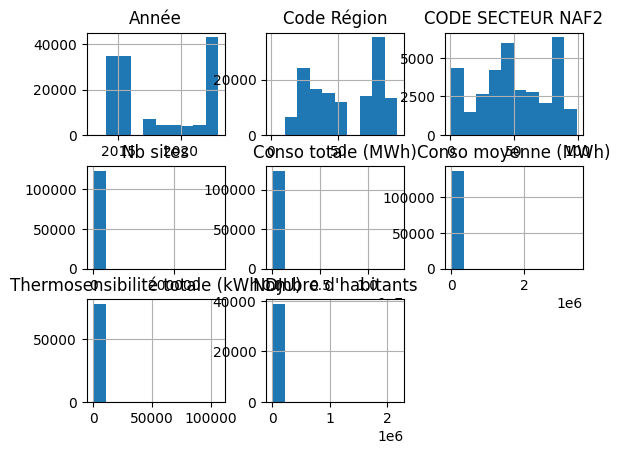

In [178]:
nouvelle_base.hist()

In [179]:
nouvelle_base.describe()

,Année,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Thermosensibilité totale (kWh DJU),Nombre d'habitants
count,136821.000000,136821.000000,34435.000000,123619.000000,1.236190e+05,1.368210e+05,77515.000000,3.869500e+04
mean,2017.884623,56.151103,49.872572,304.290230,5.061326e+03,8.349993e+02,17.021494,7.278740e+03
std,3.798778,25.963165,27.570325,2848.838104,6.003756e+04,1.907457e+04,614.390244,3.722148e+04
min,2013.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2014.000000,32.000000,31.000000,1.000000,9.858550e+01,6.346054e+00,0.000000,4.940000e+02
50%,2015.000000,53.000000,47.000000,4.000000,4.330000e+02,2.498300e+01,0.000000,1.443000e+03
75%,2023.000000,84.000000,71.000000,80.000000,1.977631e+03,1.352910e+02,0.000000,4.603500e+03
max,2023.000000,94.000000,99.000000,310261.000000,1.312829e+07,3.426639e+06,106333.382796,2.175601e+06


## Donnée de la population

In [180]:
population_ville = pd.read_csv('./data/datapopulation.csv', sep = ';', header=2)
population_ville

,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34930,97613,M'Tsangamouji,N/A - résultat non disponible
34931,97614,Ouangani,N/A - résultat non disponible
34932,97615,Pamandzi,N/A - résultat non disponible
34933,97616,Sada,N/A - résultat non disponible


In [181]:
nouvelle_population= population_ville.iloc[:34917]
nouvelle_population


,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34912,97419,Sainte-Rose,6343
34913,97420,Sainte-Suzanne,24293
34914,97421,Salazie,7243
34915,97422,Le Tampon,81943


In [182]:
#fusion la base de consommation et population

In [183]:
base_total = pd.merge(base, nouvelle_population, left_on='Code Commune', right_on='Code', how='inner')
base_total

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique,Code,Libellé,Population municipale 2021
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
3,GRDF,Gaz,2017,37124,Larçay,200073161,CC Touraine-Est Vallées,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37124,Larçay,2497
4,Enedis,Electricité,2014,37124,Larçay,200073161,CC Touraine-Est Vallées,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37124,Larçay,2497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,Enedis,Electricité,2015,68045,Bourbach-le-Bas,200036465,CC de Thann-Cernay,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68045,Bourbach-le-Bas,551
32574,Enedis,Electricité,2015,68046,Bourbach-le-Haut,200036465,CC de Thann-Cernay,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68046,Bourbach-le-Haut,414
32575,Enedis,Electricité,2015,68049,Bouxwiller,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68049,Bouxwiller,425
32576,Enedis,Electricité,2015,68049,Bouxwiller,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68049,Bouxwiller,425


## je sépare les petit et grande ville 

In [184]:
df = pd.read_csv('./data/PVD_2024.csv')
petit = df['lib_com'] 

In [185]:
petit_ville = pd.merge(base_total, petit, left_on='Nom Commune', right_on='lib_com', how='inner')
petit_ville

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique,Code,Libellé,Population municipale 2021,lib_com
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
3,GRDF,Gaz,2017,37130,Ligueil,200071587,CC Loches Sud Touraine,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37130,Ligueil,2103,Ligueil
4,Enedis,Electricité,2014,37130,Ligueil,200071587,CC Loches Sud Touraine,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37130,Ligueil,2103,Ligueil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3112,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3113,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3114,Enedis,Electricité,2015,68004,Altkirch,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,68004,Altkirch,5608,Altkirch


In [186]:
petit_ville_cleaned= petit_ville.dropna(axis=1, how='all')
petit_ville_cleaned

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Code Département,Nom Département,Code Région,...,Conso totale (MWh),Conso moyenne (MWh),Nombre de mailles secretisées,Part thermosensible (%),Thermosensibilité totale (kWh DJU),Thermosensibilité moyenne (kWh DJU),Code,Libellé,Population municipale 2021,lib_com
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,2692.00,448.666667,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,20751.19,1729.265833,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,3501.17,145.882083,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
3,GRDF,Gaz,2017,37130,Ligueil,200071587,CC Loches Sud Touraine,37,Indre-et-Loire,24,...,7066.00,20.967359,0,0.0,0.0,0.0,37130,Ligueil,2103,Ligueil
4,Enedis,Electricité,2014,37130,Ligueil,200071587,CC Loches Sud Touraine,37,Indre-et-Loire,24,...,7829.76,6.283917,0,0.0,0.0,0.0,37130,Ligueil,2103,Ligueil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,133.24,44.413333,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3112,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,13184.50,1318.450000,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3113,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,6376.00,265.666667,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3114,Enedis,Electricité,2015,68004,Altkirch,200066041,CC Sundgau,68,Haut-Rhin,44,...,15074.62,255.502034,0,0.0,0.0,0.0,68004,Altkirch,5608,Altkirch


In [187]:
petit_ville_cleaned.isnull().sum()

OPERATEUR                               0
FILIERE                                 0
Année                                   0
Code Commune                            0
Nom Commune                             0
Code EPCI                               0
Nom EPCI                                0
Code Département                        0
Nom Département                         0
Code Région                             0
Nom Région                              0
CODE CATEGORIE CONSOMMATION             0
CODE GRAND SECTEUR                      0
Nb sites                               86
Conso totale (MWh)                     86
Conso moyenne (MWh)                     0
Nombre de mailles secretisées           0
Part thermosensible (%)                 0
Thermosensibilité totale (kWh DJU)      0
Thermosensibilité moyenne (kWh DJU)     0
Code                                    0
Libellé                                 0
Population municipale 2021              0
lib_com                           

array([[<Axes: title={'center': 'Année'}>,
        <Axes: title={'center': 'Code Région'}>,
        <Axes: title={'center': 'Nb sites'}>],
       [<Axes: title={'center': 'Conso totale (MWh)'}>,
        <Axes: title={'center': 'Conso moyenne (MWh)'}>,
        <Axes: title={'center': 'Nombre de mailles secretisées'}>],
       [<Axes: title={'center': 'Part thermosensible (%)'}>,
        <Axes: title={'center': 'Thermosensibilité totale (kWh DJU)'}>,
        <Axes: title={'center': 'Thermosensibilité moyenne (kWh DJU)'}>]],
      dtype=object)

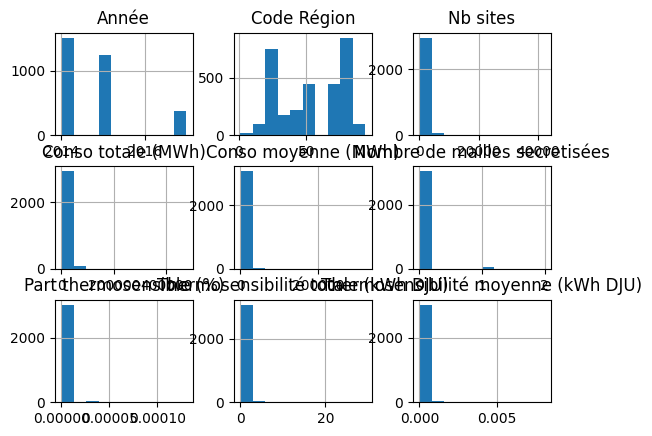

In [188]:
petit_ville_cleaned.hist()

## faire les graphique avec ls petite ville

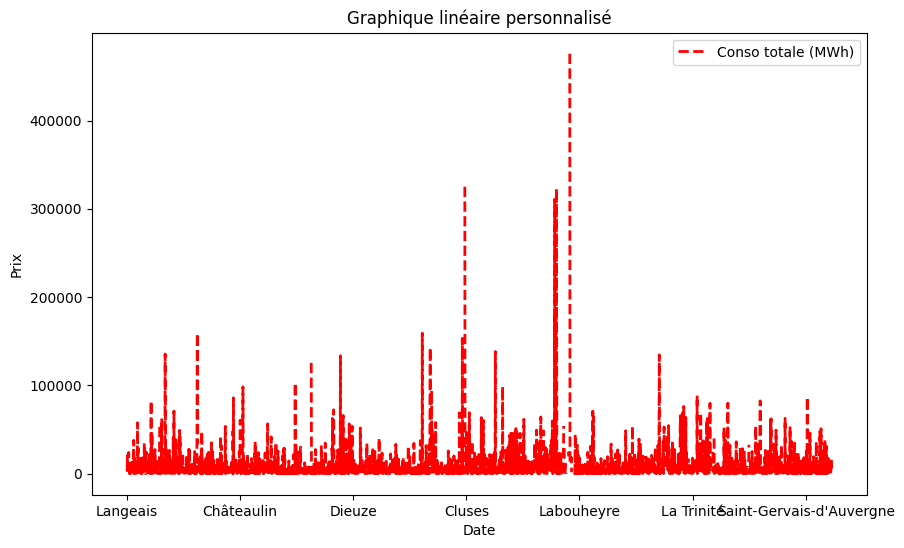

In [195]:
petit_ville_cleaned.plot(kind='line', x='Nom Commune', y='Conso totale (MWh)', figsize=(10, 6), color='red', linestyle='dashed', linewidth=2)
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

## Exemple de faire une carte vide 

In [190]:
#Position [latitude, longitude] sur laquelle est centrée la carte
location = [47, 1]

#Niveau de zoom initial : 
#3-4 pour un continent, 5-6 pour un pays, 11-12 pour une ville
zoom = 6

#Style de la carte
tiles = 'cartodbpositron'

Carte = folium.Map(location = location,
                   zoom_start = zoom,
                   tiles = tiles)


display(Carte)

In [191]:
#Position du marqueur
location = [45.8, 1.2]

#Texte à afficher lorsqu'on clique sur le marqueur
texte = "Limoge est là (à peu près)"

#Création du marqueur
marqueur = folium.Marker(location = location,
                        popup = texte)

#Ajout à la carte
marqueur.add_to(Carte)

display(Carte)